In [1]:
import csv

filename = 'data/death_valley_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    for index, column_header in enumerate(header_row):
        print(index, column_header)

0 STATION
1 NAME
2 DATE
3 PRCP
4 TMAX
5 TMIN
6 TOBS


Missing data for 2018-02-18 00:00:00


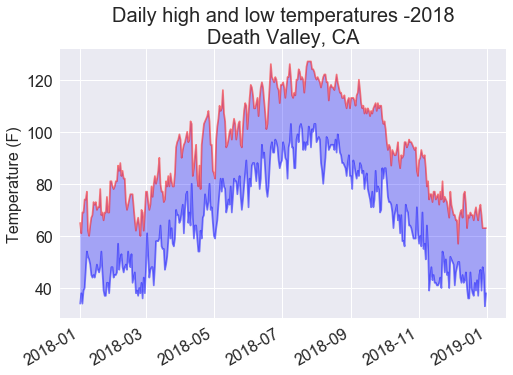

In [3]:
import csv

from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/death_valley_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    # ファイルから日付と最高気温,最低気温を取得する
    dates, highs, lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        try:
            high = int(row[4])
            low = int(row[5])
        except ValueError:
            print(f"Missing data for {current_date}")
        else:
            dates.append(current_date)
            highs.append(high)
            lows.append(low)
    
# ファイルから最高気温と最低気温のグラフを描画する
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.5)
ax.plot(dates, lows, c='blue', alpha=0.5)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.3)

# グラフにフォーマットを指定する
title = "Daily high and low temperatures -2018\nDeath Valley, CA"
plt.title(title, fontsize=20)
plt.xlabel('', fontsize=14)
fig.autofmt_xdate()
plt.ylabel('Temperature (F)', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
        
plt.show()